<a href="https://colab.research.google.com/github/dwaipayan12-dev/Apple-Quality-Prediction/blob/main/Apple_Quality2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step_1:Loading the dataset

In [ ]:

from google.colab import files
import pandas as pd

# Upload the CSV file
uploaded = files.upload()

# Get the file name
filename = list(uploaded.keys())[0]

# Read the CSV file into a DataFrame
df = pd.read_csv(filename)

# Display the first few rows of the DataFrame
df.head()


Saving apple_quality.csv to apple_quality.csv


,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [ ]:
import pandas as pd
#df = pd.read_csv('"E:\4. Students_ Projects\14. Azhar Student Project\Tanjel\2. Apple quality check\apple_quality.csv"')

df.isnull().sum()
df[df.isnull().any(axis=1)]
df1 = df.drop(['A_id'],axis = 1)
df1 = df1.dropna()
df1

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...
3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784369,bad
3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good


K-fold cross validation for SVC

In [ ]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, KFold, cross_val_score

svc=SVC(kernel='linear',C=1)

X = df1.drop(['Quality'],axis=1)
y = df1['Quality']

training_sizes=np.arange(0.4,0.9,0.1)
for train_size in training_sizes:
  print(f"\nTraining set size:{int(train_size*100)}%")
  X_train,X_test,Y_train,Y_test = train_test_split(X, y, train_size=train_size, random_state=42)
  kf = KFold(n_splits=5, shuffle=True, random_state=42)
  scores1 = cross_val_score(svc, X_train, Y_train, cv=kf)
  print("Cross-validation scores of SVC:", scores1)
  print("Mean cross-validation score of SVC:", np.mean(scores1))


Training set size:40%
Cross-validation scores of SVC: [0.740625 0.725    0.725    0.721875 0.75625 ]
Mean cross-validation score of SVC: 0.7337499999999999

Training set size:50%
Cross-validation scores of SVC: [0.7825 0.7575 0.7375 0.725  0.7075]
Mean cross-validation score of SVC: 0.742

Training set size:60%
Cross-validation scores of SVC: [0.73541667 0.79375    0.73958333 0.71458333 0.72708333]
Mean cross-validation score of SVC: 0.7420833333333333

Training set size:70%
Cross-validation scores of SVC: [0.73392857 0.74821429 0.74464286 0.72321429 0.75892857]
Mean cross-validation score of SVC: 0.7417857142857143

Training set size:80%
Cross-validation scores of SVC: [0.7359375  0.7421875  0.7546875  0.7140625  0.79029734]
Mean cross-validation score of SVC: 0.7474344679186228


In [ ]:
scores1

array([0.7359375 , 0.7421875 , 0.7546875 , 0.7140625 , 0.79029734])

K-fold cross validation for KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=8, weights = 'distance', algorithm = 'auto', p = 2)

X = df1.drop(['Quality'],axis=1)
y = df1['Quality']

training_sizes=np.arange(0.4,0.9,0.1)
for train_size in training_sizes:
  print(f"\nTraining set size:{int(train_size*100)}%")
  X_train,X_test,Y_train,Y_test = train_test_split(X, y, train_size=train_size, random_state=42)
  kf = KFold(n_splits=5, shuffle=True, random_state=42)
  scores2 = cross_val_score(knn_model, X_train, Y_train, cv=kf)
  print("Cross-validation scores of KNN:", scores2)
  print("Mean cross-validation score of KNN:", np.mean(scores2))




Training set size:40%
Cross-validation scores of KNN: [0.865625 0.925    0.871875 0.878125 0.86875 ]
Mean cross-validation score of KNN: 0.881875

Training set size:50%
Cross-validation scores of KNN: [0.8825 0.9025 0.905  0.8975 0.86  ]
Mean cross-validation score of KNN: 0.8895

Training set size:60%
Cross-validation scores of KNN: [0.87708333 0.87916667 0.89375    0.89166667 0.91666667]
Mean cross-validation score of KNN: 0.8916666666666668

Training set size:70%
Cross-validation scores of KNN: [0.9        0.90357143 0.88928571 0.8875     0.89285714]
Mean cross-validation score of KNN: 0.8946428571428573

Training set size:80%
Cross-validation scores of KNN: [0.9        0.88125    0.896875   0.8859375  0.91392801]
Mean cross-validation score of KNN: 0.8955981025039124


In [ ]:
scores2

array([0.9       , 0.88125   , 0.896875  , 0.8859375 , 0.91392801])

K-fold cross validation for MLPClassifier

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier(alpha=0.01,max_iter=300,random_state=42)

X= df1.drop(['Quality'],axis=1)
y = df1['Quality']

training_sizes=np.arange(0.4,0.9,0.1)
for train_size in training_sizes:
  print(f"\nTraining set size:{int(train_size*100)}%")
  X_train,X_test,Y_train,Y_test = train_test_split(X, y, train_size=train_size, random_state=42)
  kf = KFold(n_splits=5, shuffle=True, random_state=42)
  scores3 = cross_val_score(mlp_model, X_train, Y_train, cv=kf)
  print("Cross-validation scores:", scores3)
  print("Mean cross-validation score:", np.mean(scores3))


Training set size:40%


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Cross-validation scores: [0.903125 0.921875 0.865625 0.890625 0.9     ]
Mean cross-validation score: 0.89625

Training set size:50%


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Cross-validation scores: [0.9175 0.895  0.8925 0.89   0.88  ]
Mean cross-validation score: 0.8950000000000001

Training set size:60%


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Cross-validation scores: [0.90208333 0.89375    0.89791667 0.91875    0.92291667]
Mean cross-validation score: 0.9070833333333332

Training set size:70%


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Cross-validation scores: [0.91607143 0.90357143 0.92142857 0.90357143 0.90892857]
Mean cross-validation score: 0.9107142857142856

Training set size:80%


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Cross-validation scores: [0.91875    0.928125   0.9203125  0.90625    0.94522692]
Mean cross-validation score: 0.9237328834115806


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
scores3

array([0.91875   , 0.928125  , 0.9203125 , 0.90625   , 0.94522692])

K-fold cross validation for GaussianNB

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB(var_smoothing=1e-11)

X = df1.drop(['Quality'],axis=1)
y = df1['Quality']

training_sizes=np.arange(0.4,0.9,0.1)
for train_size in training_sizes:
  print(f"\nTraining set size:{int(train_size*100)}%")
  X_train,X_test,Y_train,Y_test = train_test_split(X, y, train_size=train_size, random_state=42)
  kf = KFold(n_splits=5, shuffle=True, random_state=42)
  scores4 = cross_val_score(nb_model, X_train, Y_train, cv=kf)
  print("Cross-validation scores:", scores4)
  print("Mean cross-validation score:", np.mean(scores4))


Training set size:40%
Cross-validation scores: [0.734375 0.759375 0.759375 0.728125 0.725   ]
Mean cross-validation score: 0.74125

Training set size:50%
Cross-validation scores: [0.735 0.74  0.745 0.745 0.745]
Mean cross-validation score: 0.7420000000000001

Training set size:60%
Cross-validation scores: [0.73958333 0.7625     0.74166667 0.74375    0.73958333]
Mean cross-validation score: 0.7454166666666666

Training set size:70%
Cross-validation scores: [0.75892857 0.73214286 0.76785714 0.725      0.74285714]
Mean cross-validation score: 0.7453571428571428

Training set size:80%
Cross-validation scores: [0.74375    0.734375   0.7234375  0.7359375  0.78090767]
Mean cross-validation score: 0.7436815336463223


In [ ]:
scores4

array([0.74375   , 0.734375  , 0.7234375 , 0.7359375 , 0.78090767])

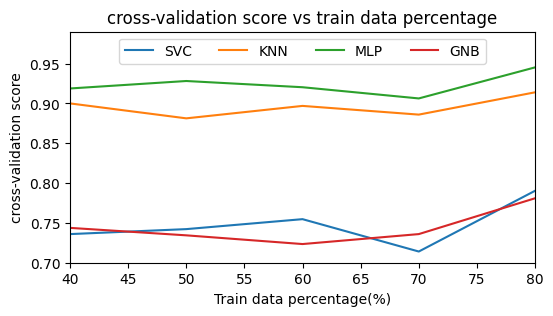

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

train_size = np.arange(0.4, 0.9, 0.1)
x_values = train_size * 100
y_values = [scores1, scores2, scores3, scores4]
labels = ['SVC', 'KNN', 'MLP', 'GNB']

# Set figure dimensions
plt.figure(figsize=(6, 3))

# Plot the data
for scores, label in zip(y_values, labels):
    plt.plot(x_values, scores, label=label)

# Setting x and y limits
plt.xlim(40, 80)
plt.ylim(0.7, 0.99)

# Adding title and labels
#plt.title('Plot of K-fold cross validation of SVC')
plt.title('cross-validation score vs train data percentage')
plt.xlabel('Train data percentage(%)')
plt.ylabel('cross-validation score')

# Adding legend with horizontal orientation
plt.legend(ncol=4, loc='upper center')


# Display the plot
plt.show()
